In [1]:
# Importamos librerías necesasrias
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

In [2]:
df_idiomas =  pd.read_csv('resumen_idiomas.csv')
df_user_reviews = pd.read_csv('user_reviews_cleaned.csv')

In [3]:
df_user_reviews.describe(include='all') 

,user_url,item_id,helpful,recommend,year,sentiment_analysis
count,44382,44382.000000,44382,44382,44382.000000,44382.000000
unique,20147,NaN,1244,2,NaN,NaN
top,http://steamcommunity.com/id/ac_elite,NaN,No ratings yet,True,NaN,NaN
freq,10,NaN,22001,38872,NaN,NaN
mean,NaN,176574.038033,NaN,NaN,2014.250642,1.522171
std,NaN,131134.944271,NaN,NaN,0.827305,0.788965
min,NaN,10.000000,NaN,NaN,2010.000000,0.000000
25%,NaN,20920.000000,NaN,NaN,2014.000000,1.000000
50%,NaN,218620.000000,NaN,NaN,2014.000000,2.000000
75%,NaN,265630.000000,NaN,NaN,2015.000000,2.000000


In [4]:
conteo_por_recomendaciones = df_user_reviews['recommend'].value_counts()
porcentaje_recomendaciones = df_user_reviews['recommend'].value_counts(normalize=True) * 100
resumen_recomendaciones = pd.DataFrame({
    'Conteo': conteo_por_recomendaciones,
    'Porcentaje': porcentaje_recomendaciones.round(2).astype(str) + '%'
})
resumen_recomendaciones = resumen_recomendaciones.sort_values(by='Conteo', ascending=False)

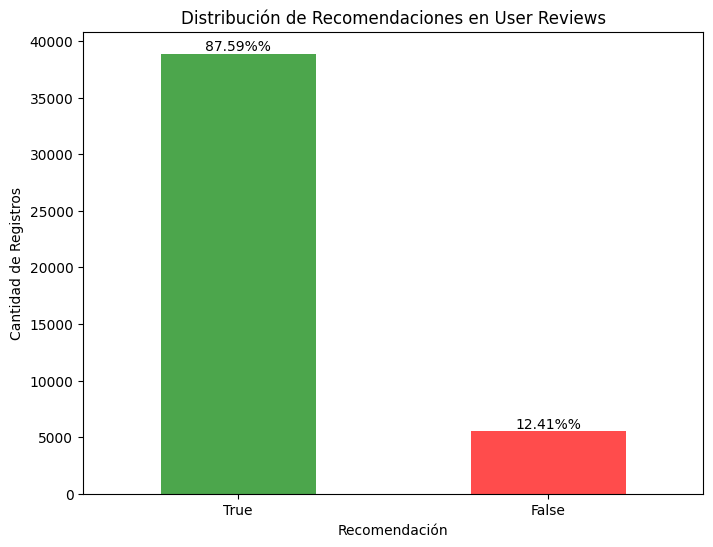

In [5]:
# Crear un gráfico de barras para visualizar las recomendaciones
plt.figure(figsize=(8, 6))
bars = resumen_recomendaciones['Conteo'].plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.title('Distribución de Recomendaciones en User Reviews')
plt.xlabel('Recomendación')
plt.ylabel('Cantidad de Registros')
for bar, percentage in zip(bars.patches, resumen_recomendaciones['Porcentaje']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{percentage}%', ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()

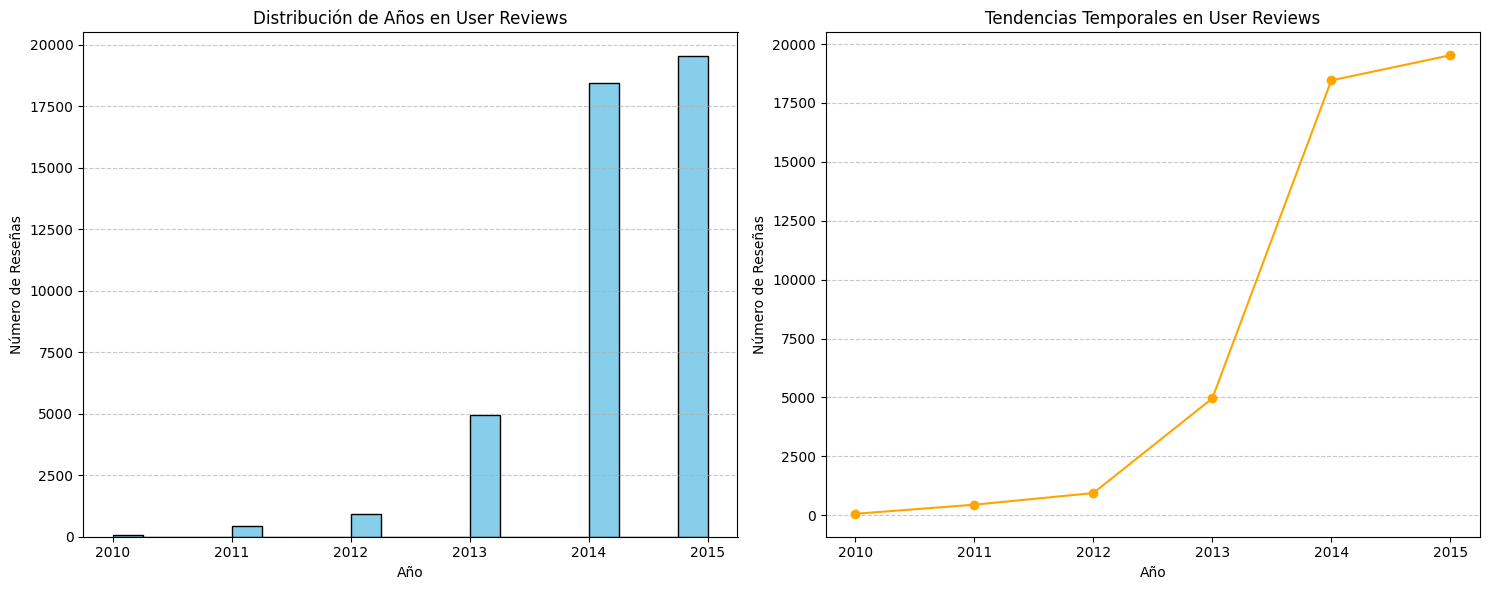

In [6]:
# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Histograma
axs[0].hist(df_user_reviews['year'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Distribución de Años en User Reviews')
axs[0].set_xlabel('Año')
axs[0].set_ylabel('Número de Reseñas')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico de líneas
trends = df_user_reviews['year'].value_counts().sort_index()
axs[1].plot(trends.index, trends.values, marker='o', linestyle='-', color='orange')
axs[1].set_title('Tendencias Temporales en User Reviews')
axs[1].set_xlabel('Año')
axs[1].set_ylabel('Número de Reseñas')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

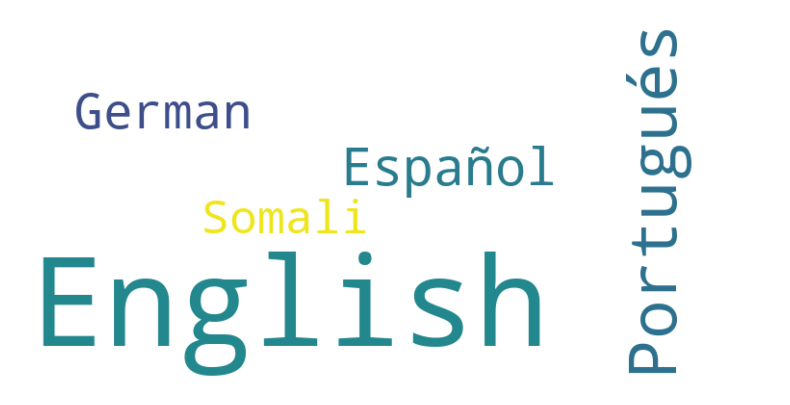

In [7]:
# Crear un diccionario con los datos del DataFrame
df_idiomas_dict = dict(zip(df_idiomas['Idioma'], df_idiomas['Conteo']))
colores = ['red', 'purple', 'blue', 'green','orange']
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(df_idiomas_dict)

# Mostrar la nube de palabras
plt.figure(figsize=(9, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

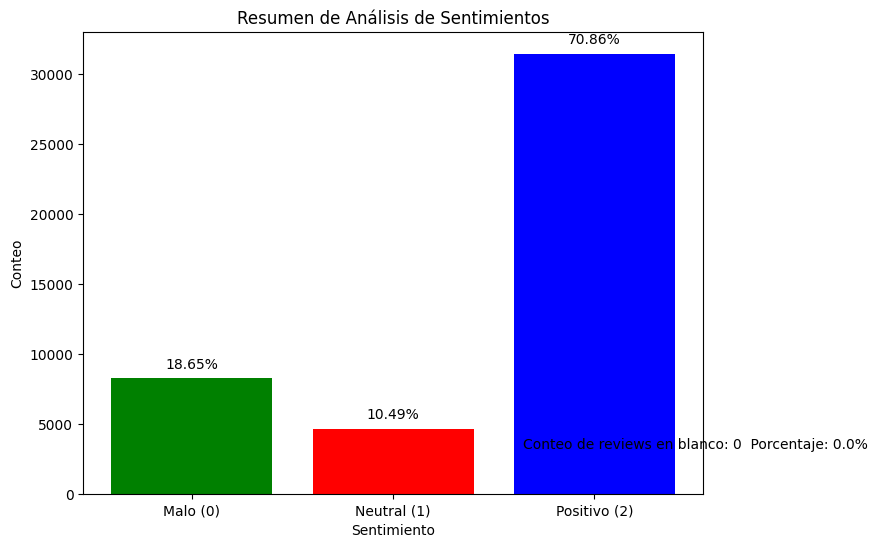

In [8]:
# summ sentiment_analysis

sentiment_summary = df_user_reviews['sentiment_analysis'].value_counts()
percentage_summary = (df_user_reviews['sentiment_analysis'].value_counts(normalize=True) * 100).round(2)
resumen_sentimientos = pd.DataFrame({
    'Conteo': sentiment_summary,
    'Porcentaje': percentage_summary.astype(str) + '%'
})

resumen_sentimientos = resumen_sentimientos.sort_index()
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(resumen_sentimientos.index, resumen_sentimientos['Conteo'], color=['green', 'red', 'blue'])
for i, v in enumerate(resumen_sentimientos['Porcentaje']):
    ax.text(i, resumen_sentimientos['Conteo'][i] + 500, f"{v}", ha='center', va='bottom')

# Configurar el gráfico
ax.set_title('Resumen de Análisis de Sentimientos')
ax.set_xlabel('Sentimiento')
ax.set_ylabel('Conteo')
ax.set_xticks(resumen_sentimientos.index)
ax.set_xticklabels(['Malo (0)', 'Neutral (1)', 'Positivo (2)'])

# Mostrar el conteo de reviews en blanco
conteo_reviews_en_blanco = (df_user_reviews['sentiment_analysis'].isnull()).sum()
porcentaje_reviews_en_blanco = (conteo_reviews_en_blanco / len(df_user_reviews) * 100).round(2)
ax.text(2.5, 3000, f"Conteo de reviews vacías: {conteo_reviews_en_blanco} - {porcentaje_reviews_en_blanco}%", ha='center', va='bottom')

plt.show()